
# Sentiment Analysis - The Effects of Sentiments on Engagement

This project explores the question: Does the nature of the hashtag (it being postively worded or negatively worded) have an impact on the auidence interaction levels?

The primary dataset for this project will be obtained from Kaggle, a Google-owned platform for public data sharing. The social media dataset includes a moderate sample size of over seven hundred records and has a high usability score, ensuring accuracy and validity.

We will:

- Explore, clean, and analyze the dataset.
- Classify hashtags into positive and negative categories based on emotional tone.
- Visualize relationships between hashtag sentiment and audience engagement metrics such as likes and retweets.
- Identify which type of hashtag, positive or negative, shows a stronger association with audience interaction.

By the end of this project, we will understand how the emotional tone of hashtags influences engagement levels, revealing how language impacts social media visibility and user response.

### To import the required library:

In [75]:
# import pands, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

# set the plotting style
sns.set_style("whitegrid")

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

### To load the dataset:

In [76]:
df_social= pd.read_csv("https://raw.githubusercontent.com/Jimmynam0103/Hashtag_Engagement/refs/heads/main/data/sentimentdataset.csv")

In [77]:
df_social.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


### To strip whitespaces from the cells where we have strings:

In [78]:
df_social = df_social.applymap(lambda x: x.strip() if isinstance(x,str) else x)

/var/folders/fl/1v09j2_57fg6drj48nv618w00000gn/T/ipykernel_16730/2778840378.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_social = df_social.applymap(lambda x: x.strip() if isinstance(x,str) else x)


In [79]:
df_social.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


### Filter the required columns:

In [80]:
df_social = df_social[
    ['Timestamp','User', 'Platform', 'Hashtags', 'Sentiment', 'Likes', 'Retweets']]

In [81]:
df_social.head(100)

,Timestamp,User,Platform,Hashtags,Sentiment,Likes,Retweets
0,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,Positive,30.0,15.0
1,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Negative,10.0,5.0
2,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,Positive,40.0,20.0
3,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,Positive,15.0,8.0
4,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,Neutral,25.0,12.0
...,...,...,...,...,...,...,...
95,2023-02-27 14:20:00,ConfusedMind2,Instagram,#Confusion #MakingSense,Confusion,50.0,25.0
96,2023-02-27 18:45:00,BirthdayExcite,Facebook,#Excitement #SurpriseParty,Excitement,45.0,22.0
97,2023-02-28 11:30:00,KindnessObserver,Twitter,#Kindness #ActsOfKindness,Kind,40.0,20.0
98,2023-02-28 16:00:00,FitAchiever,Instagram,#Pride #FitnessChallengeCompleted,Pride,60.0,30.0


### Check if there is any missing value:

In [82]:
df_social.isna().sum().to_frame(name='Number of Missing Values')

,Number of Missing Values
Timestamp,0
User,0
Platform,0
Hashtags,0
Sentiment,0
Likes,0
Retweets,0


The result indicates that in each of our cells that we dont have missing values. 

To check metadata info:

In [83]:
df_social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  732 non-null    object 
 1   User       732 non-null    object 
 2   Platform   732 non-null    object 
 3   Hashtags   732 non-null    object 
 4   Sentiment  732 non-null    object 
 5   Likes      732 non-null    float64
 6   Retweets   732 non-null    float64
dtypes: float64(2), object(5)
memory usage: 40.2+ KB


The column containing hashtags in dataframe include multiple hashtags per column. We do need to perform some text process that seperates each hashtag into its own single phrase:

### To split hashtags included in the hashtag column to seperate hashtags in a list:

In [84]:
df_social["hashtags_list"] = df_social["Hashtags"].str.lower().str.split()

Note: During analysis, we found that individual hashtags do not reliably correspond to a specific sentiment. A hashtag alone does not necessarily indicate whether a post is positive, negative, or neutral. Because of this, our analysis shifts focus from hashtags to the sentiment expressed within the content itself and how that sentiment relates to engagement (likes and retweets).

### Check if there are any missing values:

/var/folders/fl/1v09j2_57fg6drj48nv618w00000gn/T/ipykernel_16730/3074721119.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_df["Sentiment"], palette='viridis', order=top_20_sents)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Positive'),
  Text(1, 0, 'Joy'),
  Text(2, 0, 'Excitement'),
  Text(3, 0, 'Contentment'),
  Text(4, 0, 'Neutral'),
  Text(5, 0, 'Gratitude'),
  Text(6, 0, 'Curiosity'),
  Text(7, 0, 'Serenity'),
  Text(8, 0, 'Happy'),
  Text(9, 0, 'Nostalgia'),
  Text(10, 0, 'Despair'),
  Text(11, 0, 'Grief'),
  Text(12, 0, 'Awe'),
  Text(13, 0, 'Sad'),
  Text(14, 0, 'Hopeful'),
  Text(15, 0, 'Loneliness'),
  Text(16, 0, 'Embarrassed'),
  Text(17, 0, 'Acceptance'),
  Text(18, 0, 'Confusion'),
  Text(19, 0, 'Euphoria')])

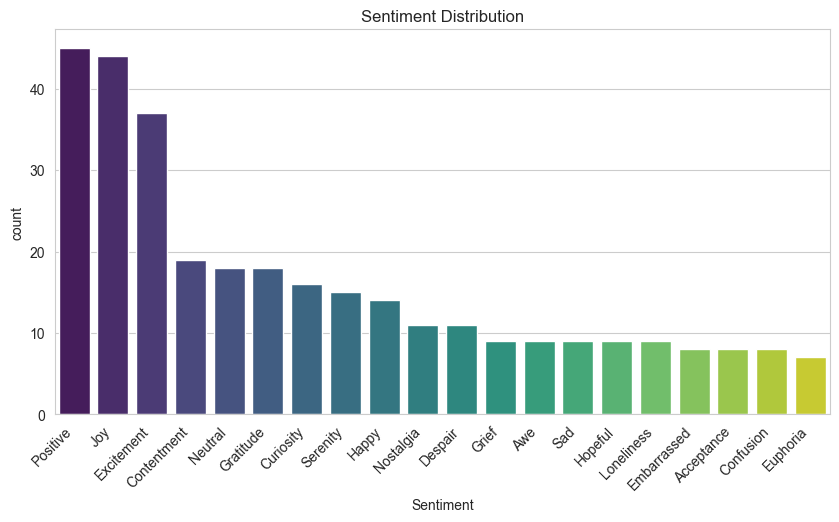

In [85]:
sns.set_style("whitegrid")

top_20_sents = df_social["Sentiment"].value_counts().nlargest(20).index
filtered_df = df_social[df_social["Sentiment"].isin(top_20_sents)]

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.countplot(x=filtered_df["Sentiment"], palette='viridis', order=top_20_sents)
plt.title("Sentiment Distribution")
plt.xticks(rotation=45, ha="right")

The above bar chart shows that positive sentiments like “Positive,” “Joy,” and “Excitement” appear most often, meaning users generally show more engagement with content that have more positive sentiment for our dataset . Negative sentiments such as “Hate” or “Bad” are much less common, showing that uplifting posts are more frequent in this dataset.

## Average Likes per sentiment:

#### To plot of graph that represents the Average likes per sentiment:

/var/folders/fl/1v09j2_57fg6drj48nv618w00000gn/T/ipykernel_16730/3692160082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


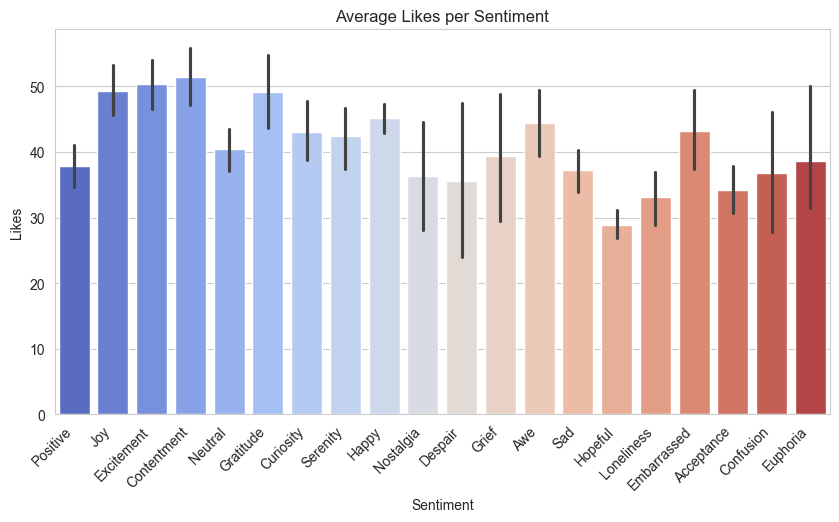

In [86]:
plt.figure(figsize=(10, 5))

sns.barplot(
    x=filtered_df["Sentiment"],
    y=filtered_df["Likes"],
    palette="coolwarm",
    order=top_20_sents
)

plt.title("Average Likes per Sentiment")
plt.xticks(rotation=45, ha="right")

plt.show()

The results show that positive emotions like Joy, Excitement, and Hopeful tend to get more likes. However, some negative emotions such as Despair or Contentment also get attention, possibly because people relate to those feelings. This suggests that while positive posts get more engagement overall, emotional connection matters too.

### Average Likes And Retweets Per Sentiment Category

 In this step, we will group the data by the three sentiment categories: Positive, Negative, and Neutral and calculate the average number of likes and retweets for each. This helps us understand how overall emotional tone affects audience engagement.

In [87]:
# we will Categorize sentiments into 'Positive', 'Negative', and 'Neutral'.

def categorize_sentiment(sentiment):
    """Categorizes sentiment into Positive, Negative, or Neutral based on specific keywords."""
    sentiment_lower = sentiment.lower()
    positive_sentiments = ['positive', 'joy', 'excitement', 'happy', 'contentment', 'gratitude', 'hopeful', 'elation', 'playful', 'serenity']
    negative_sentiments = ['negative', 'sad', 'embarrassed', 'loneliness', 'despair', 'bad', 'hate', 'grief']

    if any(word in sentiment_lower for word in positive_sentiments):
        return 'Positive'
    elif any(word in sentiment_lower for word in negative_sentiments):
        return 'Negative'
    else:
        return 'Neutral'

df_social['Sentiment_Category'] = df_social['Sentiment'].apply(categorize_sentiment)

#adding it to the dataframe
grouped_sentiment = df_social.groupby('Sentiment_Category')

In [88]:
display(df_social)

,Timestamp,User,Platform,Hashtags,Sentiment,Likes,Retweets,hashtags_list,Sentiment_Category
0,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,Positive,30.0,15.0,"[#nature, #park]",Positive
1,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Negative,10.0,5.0,"[#traffic, #morning]",Negative
2,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,Positive,40.0,20.0,"[#fitness, #workout]",Positive
3,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,Positive,15.0,8.0,"[#travel, #adventure]",Positive
4,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,Neutral,25.0,12.0,"[#cooking, #food]",Neutral
...,...,...,...,...,...,...,...,...,...
727,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,Happy,39.0,20.0,"[#sciencefairwinner, #highschoolscience]",Positive
728,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,Happy,48.0,25.0,"[#surprisecelebration, #highschoolfriendship]",Positive
729,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,Happy,42.0,22.0,"[#communitygiving, #highschoolphilanthropy]",Positive
730,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,Happy,43.0,21.0,"[#culturalcelebration, #highschoolunity]",Positive


The output indicates that the sentiments have been analyzed into 3 categories(positive, negative, neutral) to simplify the analysis.

In [89]:
#calculating the avg

total_metrics = grouped_sentiment[['Likes', 'Retweets']].sum()
average_metrics = grouped_sentiment[['Likes', 'Retweets']].mean()

combined_metrics = total_metrics.join(average_metrics, lsuffix='_Total', rsuffix='_Average')
display(combined_metrics)

,Likes_Total,Retweets_Total,Likes_Average,Retweets_Average
Sentiment_Category,,,,
Negative,2397.0,1204.0,37.453125,18.812500
Neutral,18932.0,9481.0,42.353468,21.210291
Positive,10075.0,5059.0,45.588235,22.891403


let us now melt the average_metrics DataFrame to prepare it for plotting a grouped bar chart.

In [90]:
melted_metrics = average_metrics.reset_index().melt(id_vars='Sentiment_Category', var_name='Metric', value_name='Average_Value')
display(melted_metrics)

,Sentiment_Category,Metric,Average_Value
0,Negative,Likes,37.453125
1,Neutral,Likes,42.353468
2,Positive,Likes,45.588235
3,Negative,Retweets,18.812500
4,Neutral,Retweets,21.210291
5,Positive,Retweets,22.891403


The dataframe is now melted. Let us now create a grouped bar plot to visualize the average likes and retweets for each sentiment category using the melted_metrics DataFrame.


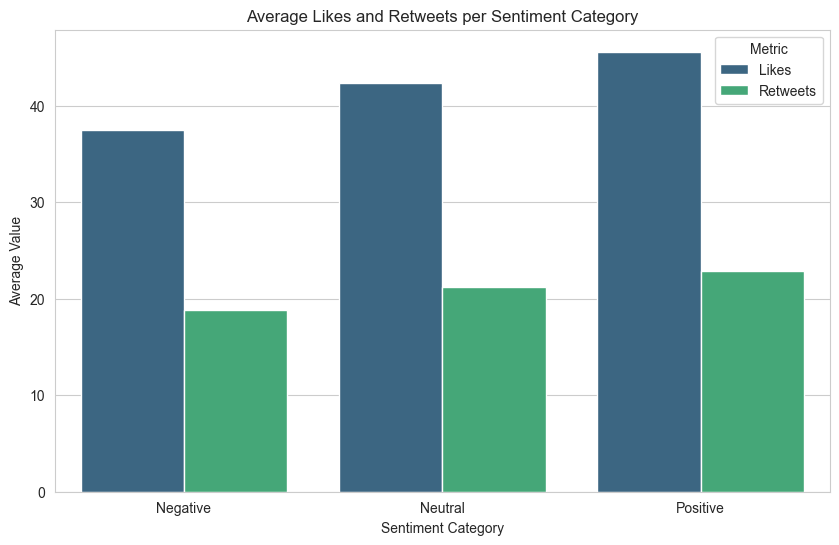

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment_Category', y='Average_Value', hue='Metric', data=melted_metrics, palette='viridis')
plt.title('Average Likes and Retweets per Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Average Value')
plt.show()

Positive posts received the highest average likes and retweets, suggesting that uplifting or encouraging emotions tend to attract more audience interaction. Neutral posts showed moderate engagement, while negative ones received slightly lower averages. This indicates that, overall, positivity drives higher engagement, but neutral content still performs reasonably well compared to negative tones.

### Top Most engaging and Least engaging hashtags

In this step, we identify the most and least engaging hashtags based on their total engagement (likes + retweets). By sorting the hashtags from highest to lowest total engagement, we can see which emotions resonate the most with audiences and which receive minimal response.

In [92]:
#total no of hashtags
num_unique_sentiments = df_social['Sentiment'].nunique()
print(f"The total number of unique sentiments is: {num_unique_sentiments}")

The total number of unique sentiments is: 191


### Further Analysis of the HashTags

In [93]:
df_exploded = df_social.explode('hashtags_list').reset_index(drop=True)


In [94]:
df_exploded

,Timestamp,User,Platform,Hashtags,Sentiment,Likes,Retweets,hashtags_list,Sentiment_Category
0,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,Positive,30.0,15.0,#nature,Positive
1,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,Positive,30.0,15.0,#park,Positive
2,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Negative,10.0,5.0,#traffic,Negative
3,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Negative,10.0,5.0,#morning,Negative
4,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,Positive,40.0,20.0,#fitness,Positive
...,...,...,...,...,...,...,...,...,...
1459,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,Happy,42.0,22.0,#highschoolphilanthropy,Positive
1460,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,Happy,43.0,21.0,#culturalcelebration,Positive
1461,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,Happy,43.0,21.0,#highschoolunity,Positive
1462,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,Happy,47.0,24.0,#virtualentertainment,Positive


In [95]:
hashtag_engagement = (
    df_exploded.groupby('hashtags_list')[['Likes', 'Retweets']]
    .sum()
    .sort_values(by=['Likes', 'Retweets'], ascending=False)
)

display(hashtag_engagement.head(10))

,Likes,Retweets
hashtags_list,,
#excitement,695.0,346.0
#serenity,636.0,317.0
#gratitude,605.0,302.0
#joy,495.0,247.0
#contentment,491.0,246.0
#awe,400.0,201.0
#nostalgia,400.0,198.0
#despair,392.0,197.0
#curiosity,388.0,194.0


To compute a column that shows the total engagement(Likes+Retweets):

In [96]:
hashtag_engagement['total_engagement'] = (
    hashtag_engagement['Likes'] + hashtag_engagement['Retweets']
)


In [97]:
sorted_hashtag_engagement = hashtag_engagement.sort_values(
    by='total_engagement', ascending=False
)

print("Top 5 Most Engaging Hashtags (by Total Engagement):")
display(sorted_hashtag_engagement.head())

print("\nBottom 5 Least Engaging Hashtags (by Total Engagement):")
display(sorted_hashtag_engagement.tail())

Top 5 Most Engaging Hashtags (by Total Engagement):


,Likes,Retweets,total_engagement
hashtags_list,,,
#excitement,695.0,346.0,1041.0
#serenity,636.0,317.0,953.0
#gratitude,605.0,302.0,907.0
#joy,495.0,247.0,742.0
#contentment,491.0,246.0,737.0



Bottom 5 Least Engaging Hashtags (by Total Engagement):


,Likes,Retweets,total_engagement
hashtags_list,,,
#sickday,15.0,7.0,22.0
#stagnation,15.0,7.0,22.0
#morning,10.0,5.0,15.0
#struggle,10.0,5.0,15.0
#traffic,10.0,5.0,15.0


The top hashtags like Excitement, Serenity, Gratitude, Joy, and Contentment show that positive emotions get the most likes and retweets. People tend to interact more with posts that feel happy or uplifting.

The bottom hashtags like Stagnation, DigitalOverload, Struggle, Traffic, and Morning show lower engagement, as they reflect stress or dull feelings. Overall, positive emotions attract more attention and interaction than negative or neutral ones.

In [98]:
df_social

,Timestamp,User,Platform,Hashtags,Sentiment,Likes,Retweets,hashtags_list,Sentiment_Category
0,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,Positive,30.0,15.0,"[#nature, #park]",Positive
1,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Negative,10.0,5.0,"[#traffic, #morning]",Negative
2,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,Positive,40.0,20.0,"[#fitness, #workout]",Positive
3,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,Positive,15.0,8.0,"[#travel, #adventure]",Positive
4,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,Neutral,25.0,12.0,"[#cooking, #food]",Neutral
...,...,...,...,...,...,...,...,...,...
727,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,Happy,39.0,20.0,"[#sciencefairwinner, #highschoolscience]",Positive
728,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,Happy,48.0,25.0,"[#surprisecelebration, #highschoolfriendship]",Positive
729,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,Happy,42.0,22.0,"[#communitygiving, #highschoolphilanthropy]",Positive
730,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,Happy,43.0,21.0,"[#culturalcelebration, #highschoolunity]",Positive


# Modelling

One question we can ask and attempt to find answer to is 
- whether there are observed differences in mean engagement metrics(Likes and Retweets) between Positive, Negative, and Neutral Posts are statistically significant?
- Does Sentiment influence engagement?


In [99]:
df_social_model = df_social.copy()

In [100]:
df_social_model["engagement"] = df_social["Likes"] + df_social["Retweets"]

In [101]:
df_exploded

,Timestamp,User,Platform,Hashtags,Sentiment,Likes,Retweets,hashtags_list,Sentiment_Category
0,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,Positive,30.0,15.0,#nature,Positive
1,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,Positive,30.0,15.0,#park,Positive
2,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Negative,10.0,5.0,#traffic,Negative
3,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,Negative,10.0,5.0,#morning,Negative
4,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,Positive,40.0,20.0,#fitness,Positive
...,...,...,...,...,...,...,...,...,...
1459,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,Happy,42.0,22.0,#highschoolphilanthropy,Positive
1460,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,Happy,43.0,21.0,#culturalcelebration,Positive
1461,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,Happy,43.0,21.0,#highschoolunity,Positive
1462,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,Happy,47.0,24.0,#virtualentertainment,Positive


### ANOVA Test

The ANOVA can help us determine whether the average mean of the Sentiment Categories is different across the 3 groups(Positive, Negative, Neutral):
- Null Hypothesis: there's is no difference in mean between the sentiment categories. 
- Alternative Hypothesis: there is difference in mean between the three Sentiment categories. 

In [102]:
from scipy.stats import f_oneway

pos = df_social_model[df_social_model['Sentiment_Category'] == 'Positive']['engagement']
neu = df_social_model[df_social_model['Sentiment_Category'] == 'Neutral']['engagement']
neg = df_social_model[df_social_model['Sentiment_Category'] == 'Negative']['engagement']

f_stat, p_val = f_oneway(pos, neu, neg)
print("ANOVA F-Statistic:", f_stat)
print("ANOVA p-value:", p_val)


ANOVA F-Statistic: 9.41104363125091
ANOVA p-value: 9.21951473473377e-05


The p-value = 0.00009219 is way smaller than 0.05- significance level. This will indicate that we reject the null hypothesis that indicates that no difference between the Snetiment groups. 

Using Regression analysis, we should be able to answr the 2nd question as to whether sentiment influences Engagement:

In order to map our Sentiment Categories to numeric score:

In [103]:
sentiment_map = {'Negative': -1, 'Neutral':0, 'Positive':1}

In [104]:
df_social_model['Sentiment_Score'] = df_social_model['Sentiment_Category'].map(sentiment_map)

To create a new column that includes total engagement:

In [105]:
df_social_model['engagement'] = df_social_model['Likes'] + df_social_model['Retweets']

In [106]:
# Define model inputs
X = df_social_model[['Sentiment_Score']]
X = sm.add_constant(X)  # Adds intercept term
y = df_social_model['engagement']

# Fit regression model
reg_model = sm.OLS(y, X).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:             engagement   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     18.39
Date:                Wed, 29 Oct 2025   Prob (F-statistic):           2.04e-05
Time:                        22:10:02   Log-Likelihood:                -3262.6
No. Observations:                 732   AIC:                             6529.
Df Residuals:                     730   BIC:                             6538.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              63.1975      0.822     

A linear regression was conducted to examine whether sentiment score predicted engagement. Results indicated that sentiment was a statistically significant predictor of engagement (β = 5.65, p < .001), such that posts with more positive sentiment received higher engagement on average. However, the effect size was small (R² = 0.025), suggesting that sentiment alone accounts for only approximately 2.5% of the variation in engagement and that other factors likely contribute to user responses.

In simple terms, we cannot conclude that sentiment — whether a post is positive, neutral, or negative — is the primary determinant of likes and retweets. Engagement is likely influenced by additional contextual factors such as the topic of the post, the popularity of the individual posting, current events, or specific content types (e.g., entertainment vs. political commentary).